In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\KIIT\\Downloads\\google_play_cleaned_data.csv')

In [3]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [4]:
df_copy=df.copy()

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10840 non-null  int64  
 5   Size            9145 non-null   float64
 6   Installs        10840 non-null  int64  
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  float64
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Day             10840 non-null  int64  
 14  Month           10840 non-null  int64  
 15  Year            10840 non-null  int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 1.3+ MB


In [6]:
df.duplicated('App')

0        False
1        False
2        False
3        False
4        False
         ...  
10835    False
10836    False
10837    False
10838    False
10839    False
Length: 10840, dtype: bool

In [7]:
df.duplicated('App').sum()

1181

##Observations 
The dataset has duplicated records

In [9]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [11]:
df_copy.duplicated('App').sum()

0

In [12]:
df_copy.shape

(9659, 16)

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
 13  Day             9659 non-null   int64  
 14  Month           9659 non-null   int64  
 15  Year            9659 non-null   int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 1.3+ MB


In [15]:
###Explore data
numeric_features=[feature for feature in df_copy.columns if df_copy[feature].dtype!='O']
categorical_features=[feature for feature in df_copy.columns if df_copy[feature].dtype=='O']

In [17]:
#Print columns 
print('We have {} numerical features={}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features={}'.format(len(categorical_features),categorical_features))

We have 9 numerical features=['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
We have 7 categorical features=['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [19]:
#proportion of count data on categorical cols
for col in categorical_features:
    print(df_copy[col].value_counts())

App
Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
CK Call NEW                                       1
Ck Coif                                           1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: count, Length: 9659, dtype: int64
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MA

In [20]:
for col in categorical_features:
    print(df_copy[col].value_counts(normalize=True)*100)

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3.5

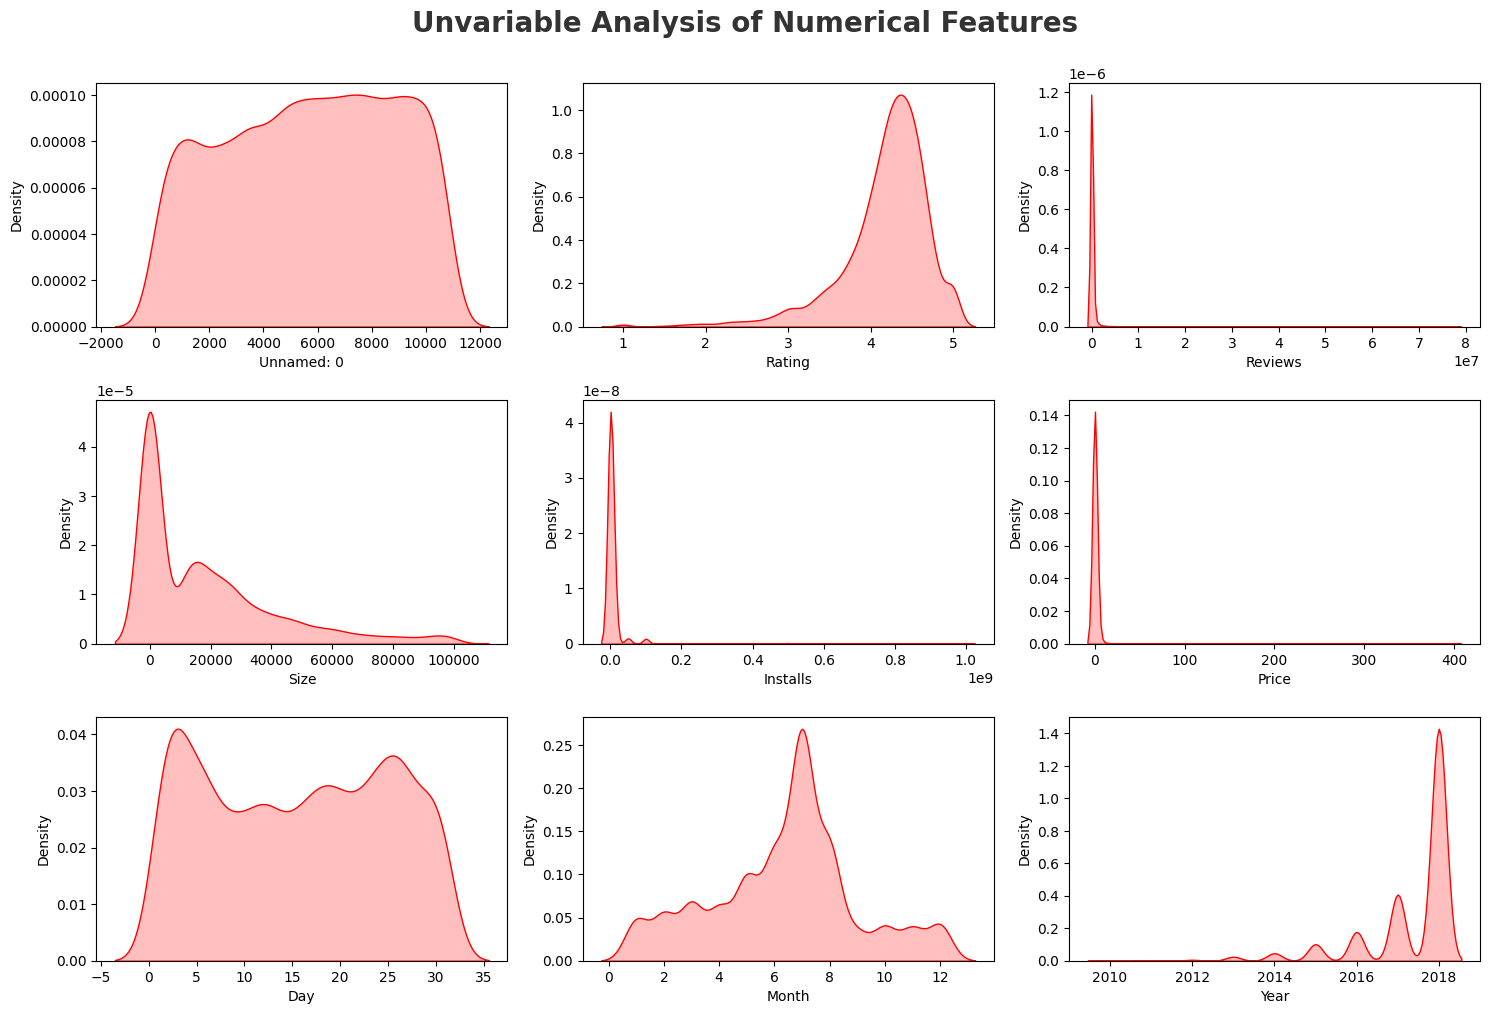

In [36]:
plt.figure(figsize=(15,16))
plt.suptitle('Unvariable Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],fill=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

##observations
-Rating and year is a left skewed 
-Reviews,Size,Installs and Price is right skewed

C:\Users\KIIT\AppData\Local\Temp\ipykernel_12672\3651058305.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy[category[i]],palette="Set2")
C:\Users\KIIT\AppData\Local\Temp\ipykernel_12672\3651058305.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy[category[i]],palette="Set2")


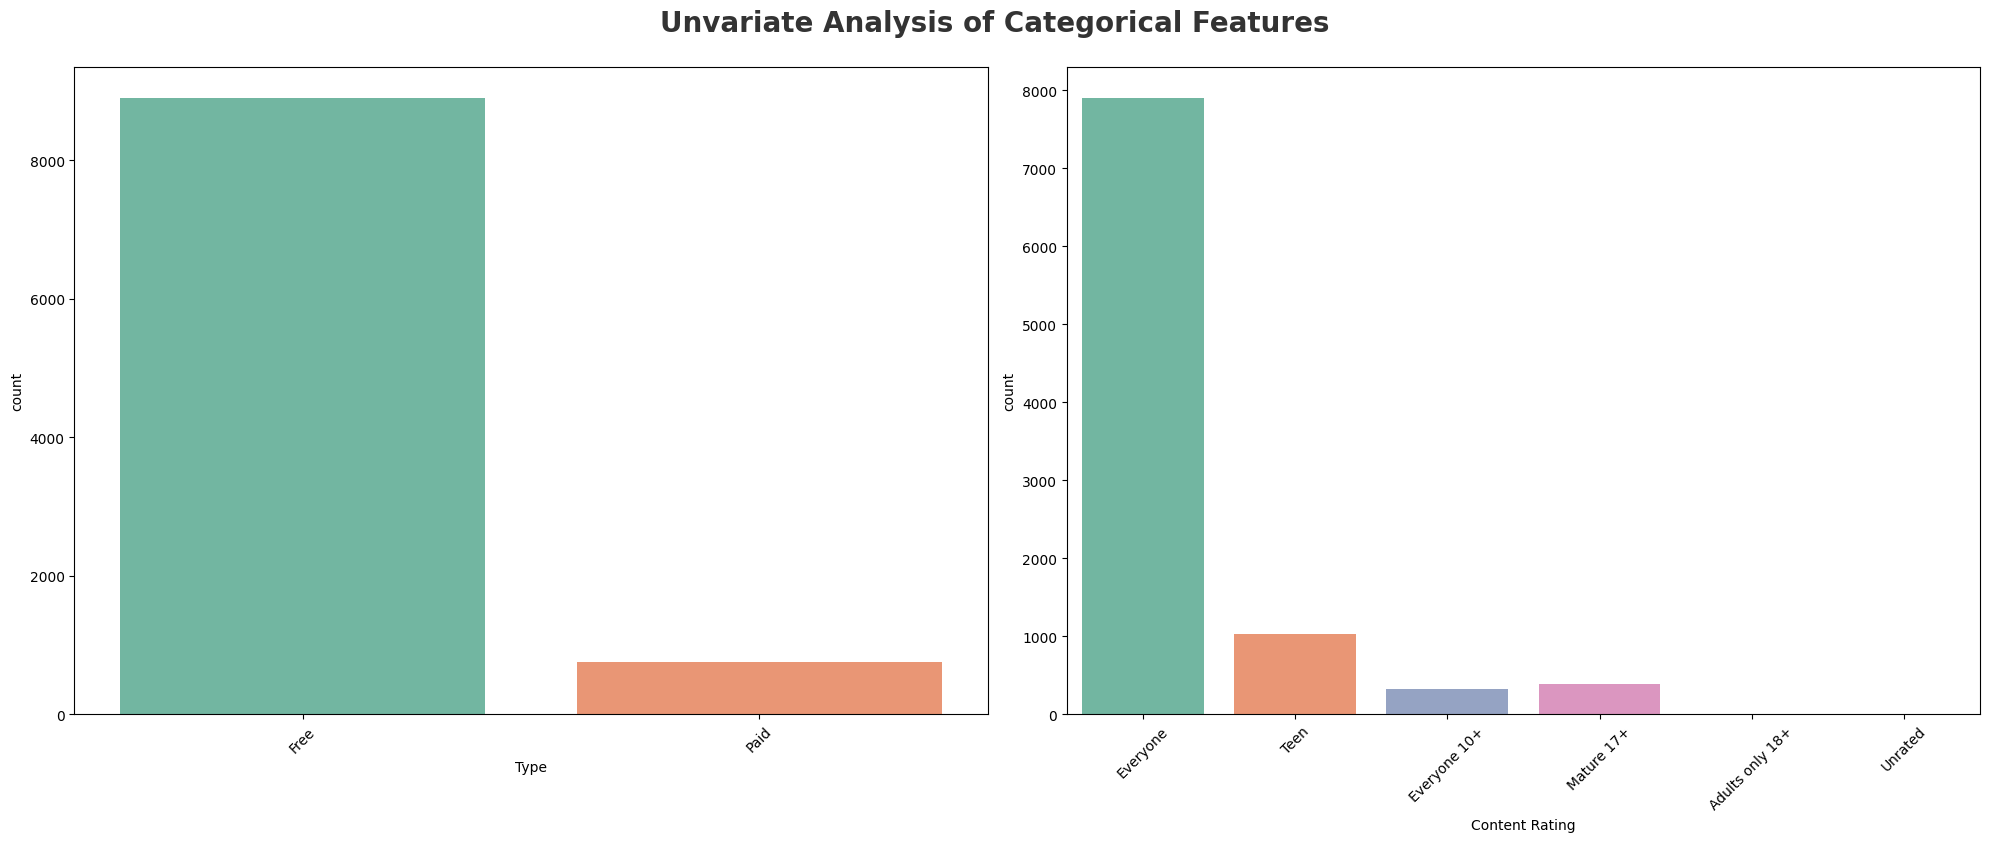

In [40]:
#Categorical columns
plt.figure(figsize=(20,15))
plt.suptitle('Unvariate Analysis of Categorical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category=['Type','Content Rating']
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df_copy[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

##observations
-Free type application is very much popular
-Content rating of Everyone is very much popular

<Axes: ylabel='count'>

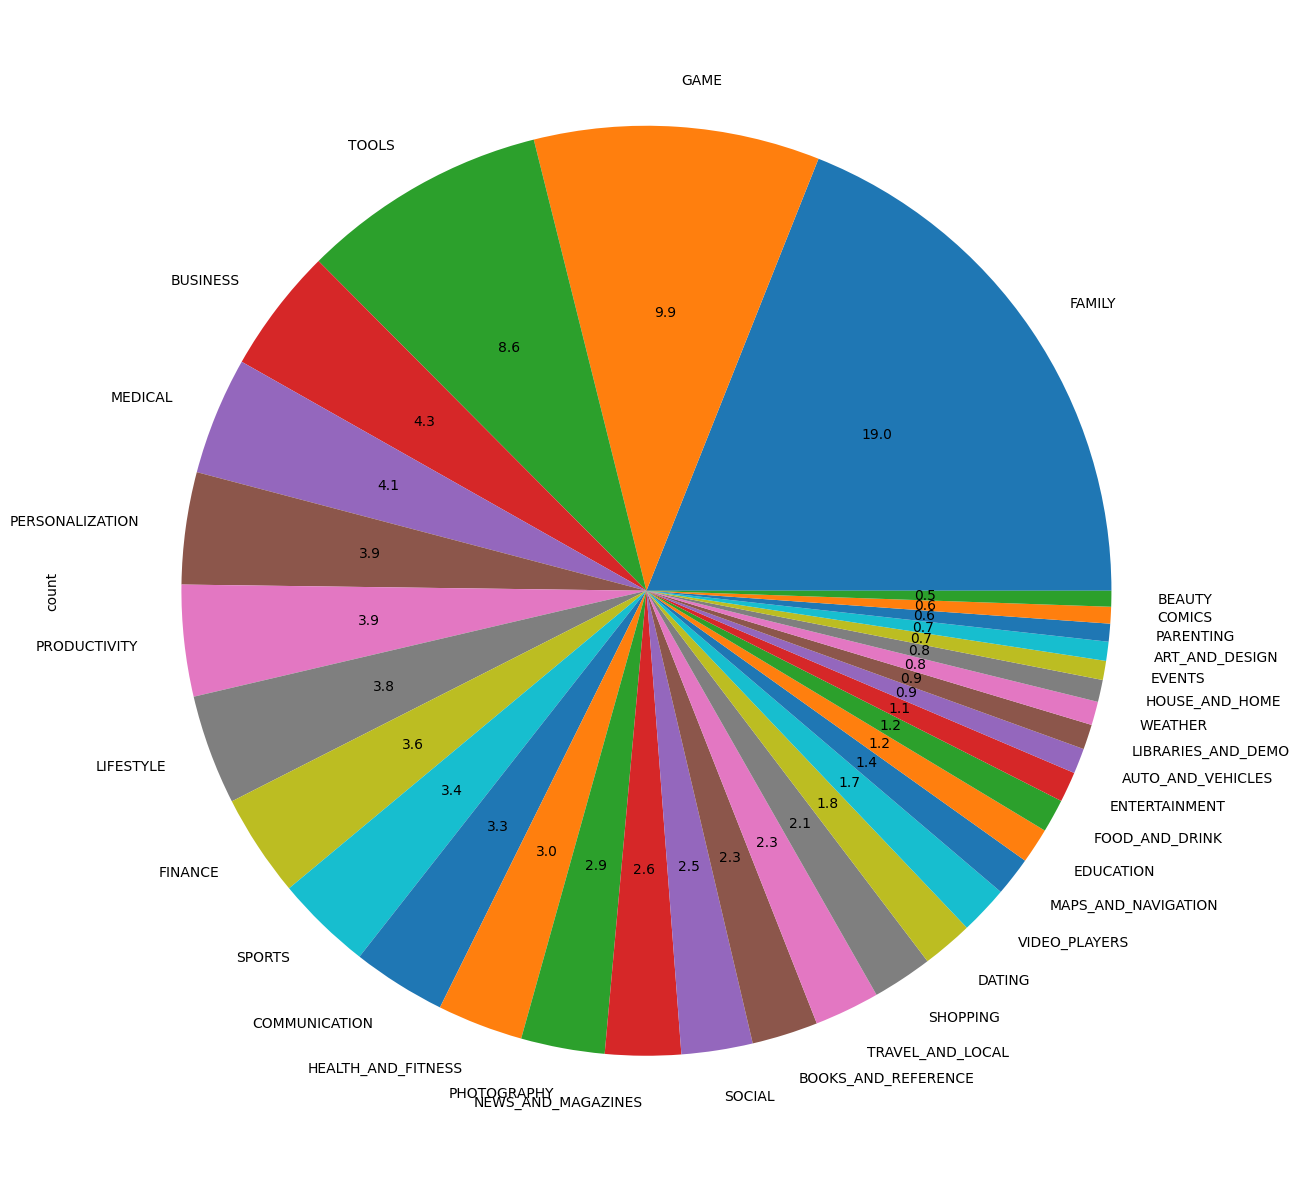

In [42]:
##which is the most popular app category?
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

In [43]:
df_copy['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

##Observations
-There are more kind of app in playstore which are under category of family,game,tools.
-Beauty,comics,arts and weather kinds of apps are very less in playstore

In [45]:
df_copy['Category'].value_counts().index[:10]

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'SPORTS'],
      dtype='object', name='Category')

In [59]:
Category=pd.DataFrame(df_copy['Category'].value_counts())
Category.rename(columns={'Category':'Count'},inplace=True)

In [60]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
 13  Day             9659 non-null   int64  
 14  Month           9659 non-null   int64  
 15  Year            9659 non-null   int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 1.3+ MB


In [61]:
Category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


C:\Users\KIIT\AppData\Local\Temp\ipykernel_12672\4057172750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Category.index[:10], y='count',data = Category[:10],palette='hls')


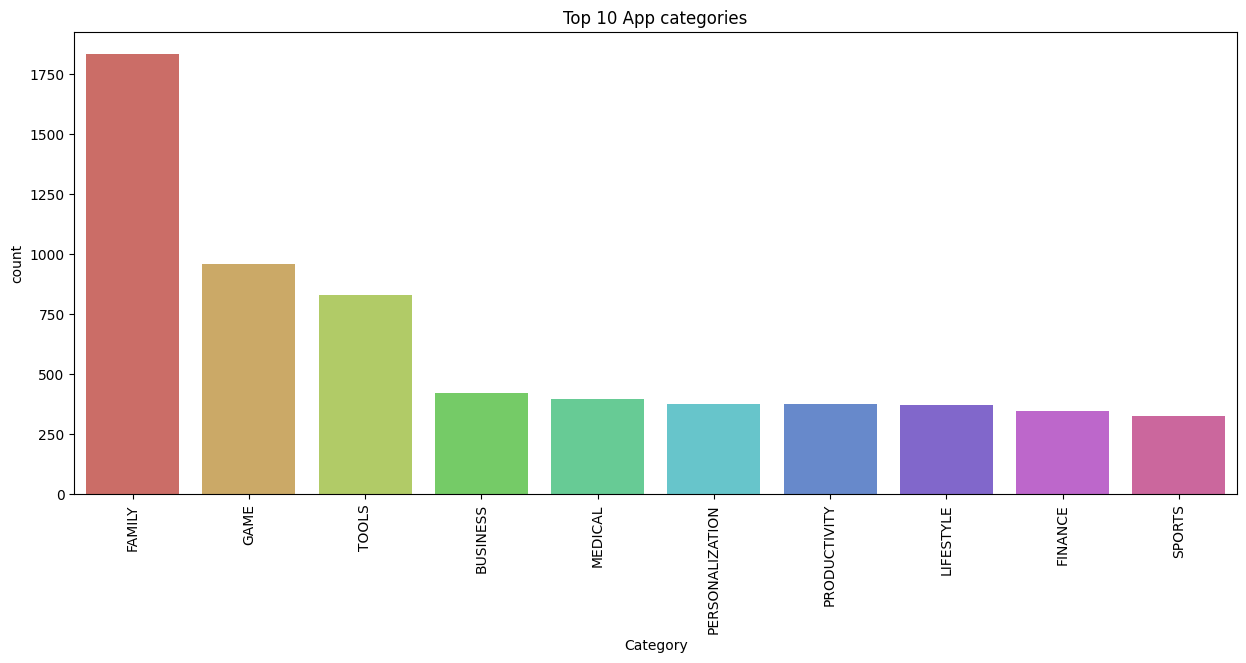

In [58]:
plt.figure(figsize=(15,6))
sns.barplot(x=Category.index[:10], y='count',data = Category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

##Insights
1.Family category has the most no.of apps with 18% of apps belonging to it,followed by Games Category which has 11% of the apps
2.Least No. of apps belong to the Beauty Category with less than 1% of the total apps belonging to it.

In [62]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()

In [63]:
df_cat_installs

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


In [65]:
df_cat_installs.Installs/1000000000

0     13.878924
1     11.038276
2      8.001772
3      5.793091
4      5.487868
5      4.649148
6      4.427942
7      3.926903
8      2.894887
9      2.369218
10     2.113660
11     1.665970
12     1.532495
13     1.400349
14     1.144023
15     1.096474
16     0.697165
17     0.503824
18     0.503282
19     0.455349
20     0.361101
21     0.352952
22     0.211799
23     0.140926
24     0.114338
25     0.097212
26     0.053130
27     0.052996
28     0.044981
29     0.038193
30     0.031521
31     0.027197
32     0.015973
Name: Installs, dtype: float64